In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [45]:

# Load the dataset

data = pd.read_csv('Telecust1.csv')

# Exploratory Data Analysis
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nDataset description:")
print(data.describe())


First 5 rows of the dataset:
   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside custcat  
0       2       A  
1       6       D  
2       2       C  
3       1       A  
4       4       C  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null

In [46]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


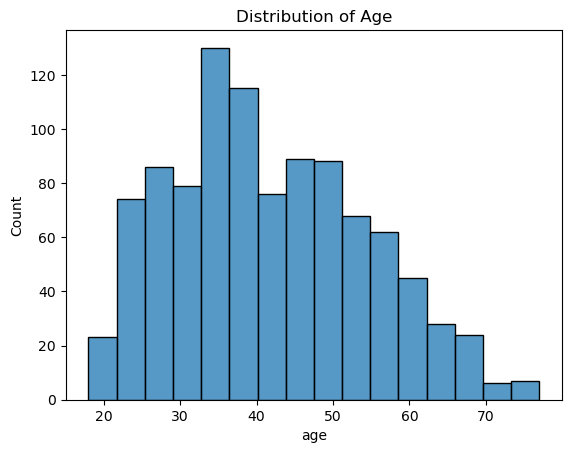

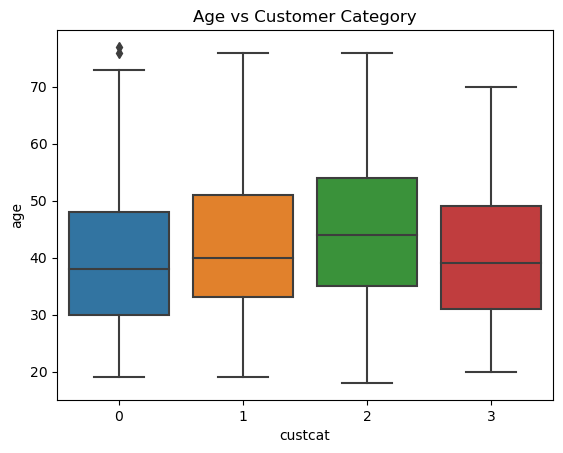

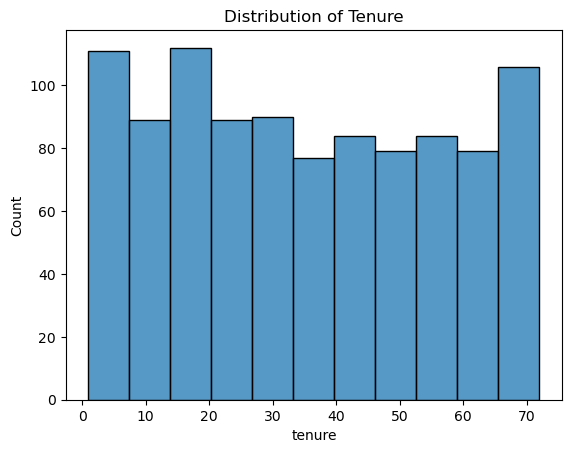

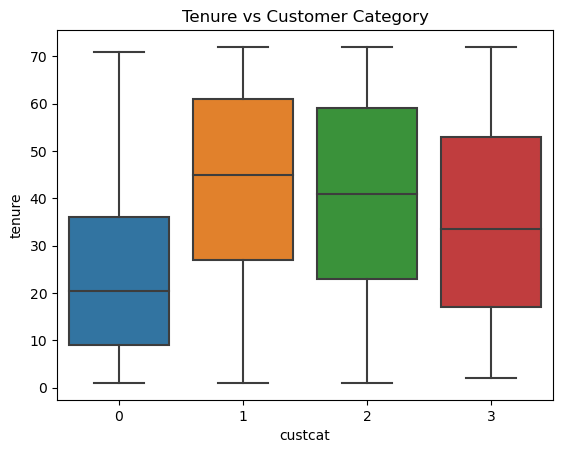

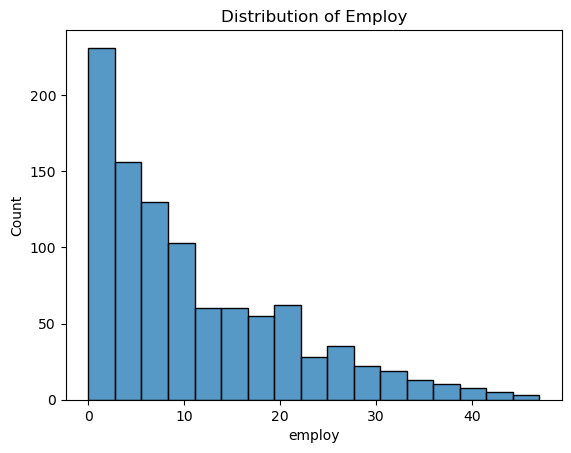

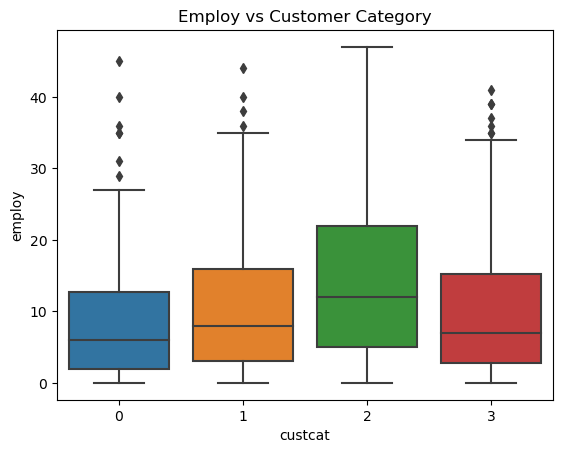

In [43]:


# Select a few key variables and study their distributions
sns.histplot(data['age'])
plt.title('Distribution of Age')
plt.show()

sns.boxplot(x='custcat', y='age', data=data)
plt.title('Age vs Customer Category')
plt.show()

# Distribution of Tenure
sns.histplot(data['tenure'])
plt.title('Distribution of Tenure')
plt.show()

# Tenure vs Customer Category
sns.boxplot(x='custcat', y='tenure', data=data)
plt.title('Tenure vs Customer Category')
plt.show()

# Distribution of Employ
sns.histplot(data['employ'])
plt.title('Distribution of Employ')
plt.show()

# Employ vs Customer Category
sns.boxplot(x='custcat', y='employ', data=data)
plt.title('Employ vs Customer Category')
plt.show()



Distribution of classes in the target variable:
custcat
2    281
0    266
3    236
1    217
Name: count, dtype: int64

Confusion Matrix:
[[27 15 25 13]
 [ 7 21 13 24]
 [15 17 31 21]
 [12 14 26 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.34      0.38        80
           1       0.31      0.32      0.32        65
           2       0.33      0.37      0.35        84
           3       0.25      0.27      0.26        71

    accuracy                           0.33       300
   macro avg       0.33      0.32      0.33       300
weighted avg       0.34      0.33      0.33       300


Accuracy Score:
0.32666666666666666


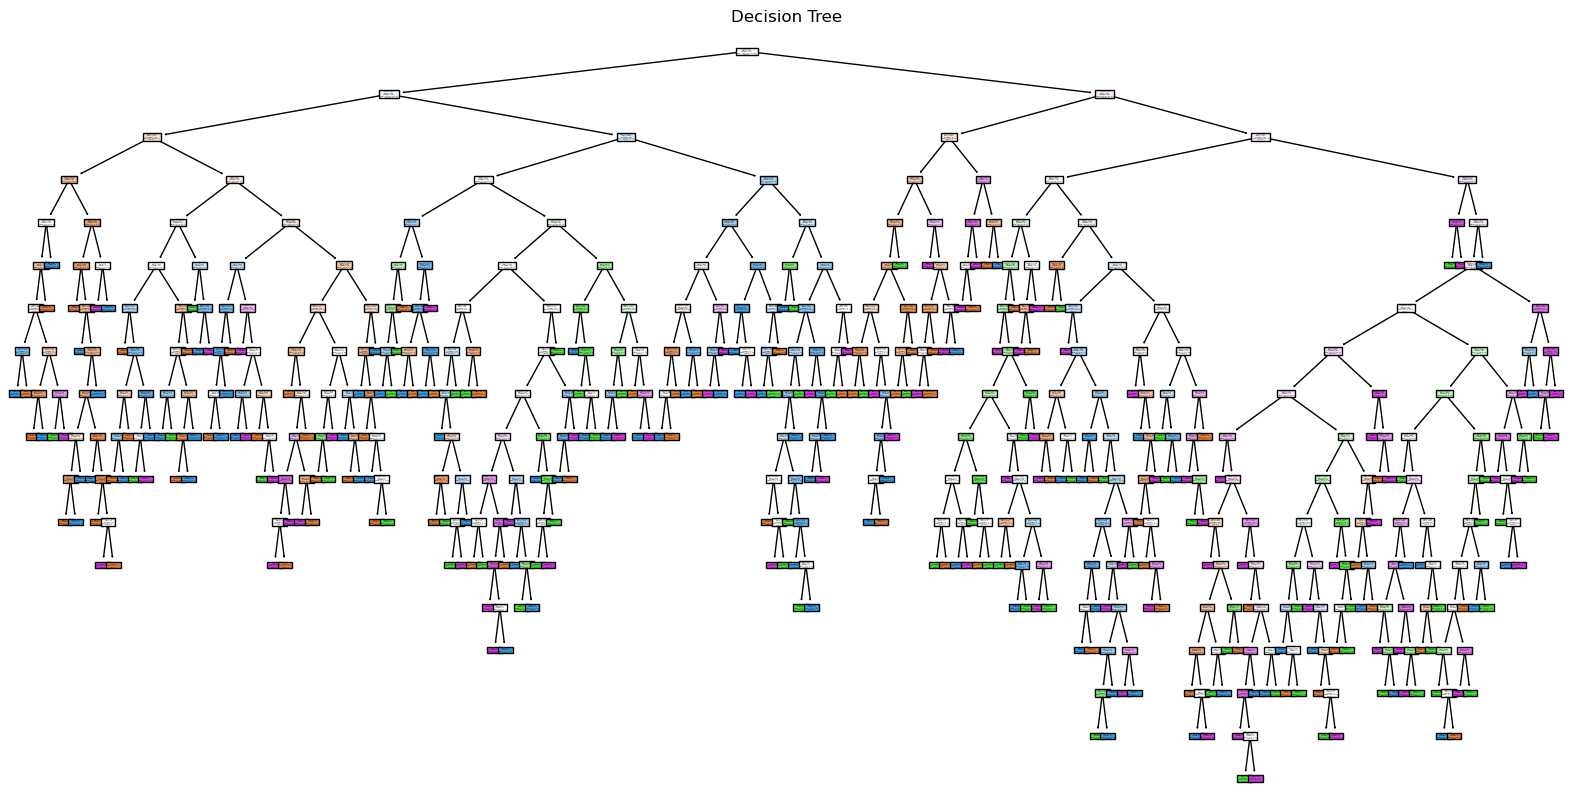

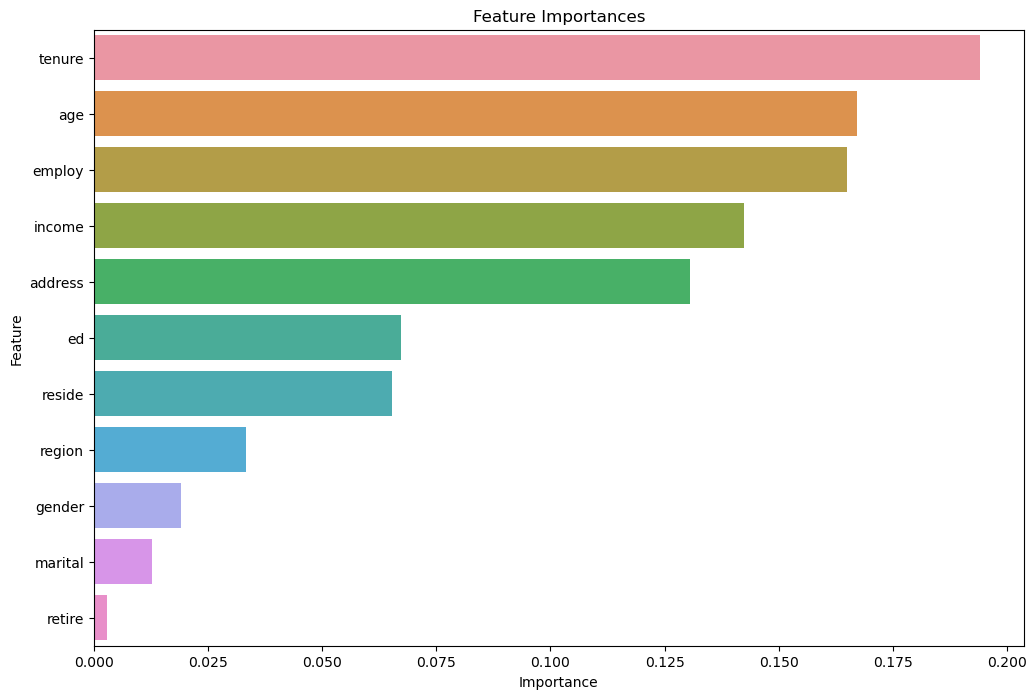

In [50]:
# Preprocessing
# Encode the target variable
data['custcat'] = data['custcat'].astype('category').cat.codes

# Splitting the data into features and target variable
X = data.drop('custcat', axis=1)
y = data['custcat']

# Check the distribution of classes in the target variable
print("\nDistribution of classes in the target variable:")
print(y.value_counts())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model Fitting
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=[str(c) for c in model.classes_])
plt.title('Decision Tree')
plt.show()

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [51]:
# Exploratory Data Analysis
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nDataset description:")
print(data.describe())

First 5 rows of the dataset:
   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       1      13   44      64        1        9   3       5       0       0   
1       2      11   33     136        1        7   4       5       0       0   
2       2      68   52     116        1       24   0      29       0       1   
3       1      33   33      33        0       12   1       0       0       1   
4       1      23   30      30        1        9   0       2       0       0   

   reside  custcat  
0       2        0  
1       6        3  
2       2        2  
3       1        0  
4       4        2  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int8 
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   income   1000 non-null   int64
 4   marital  1000 non-null


Distribution of classes in the target variable:
custcat
2    281
0    266
3    236
1    217
Name: count, dtype: int64

Confusion Matrix:
[[27 15 25 13]
 [ 7 21 13 24]
 [15 17 31 21]
 [12 14 26 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.34      0.38        80
           1       0.31      0.32      0.32        65
           2       0.33      0.37      0.35        84
           3       0.25      0.27      0.26        71

    accuracy                           0.33       300
   macro avg       0.33      0.32      0.33       300
weighted avg       0.34      0.33      0.33       300


Accuracy Score:
0.32666666666666666


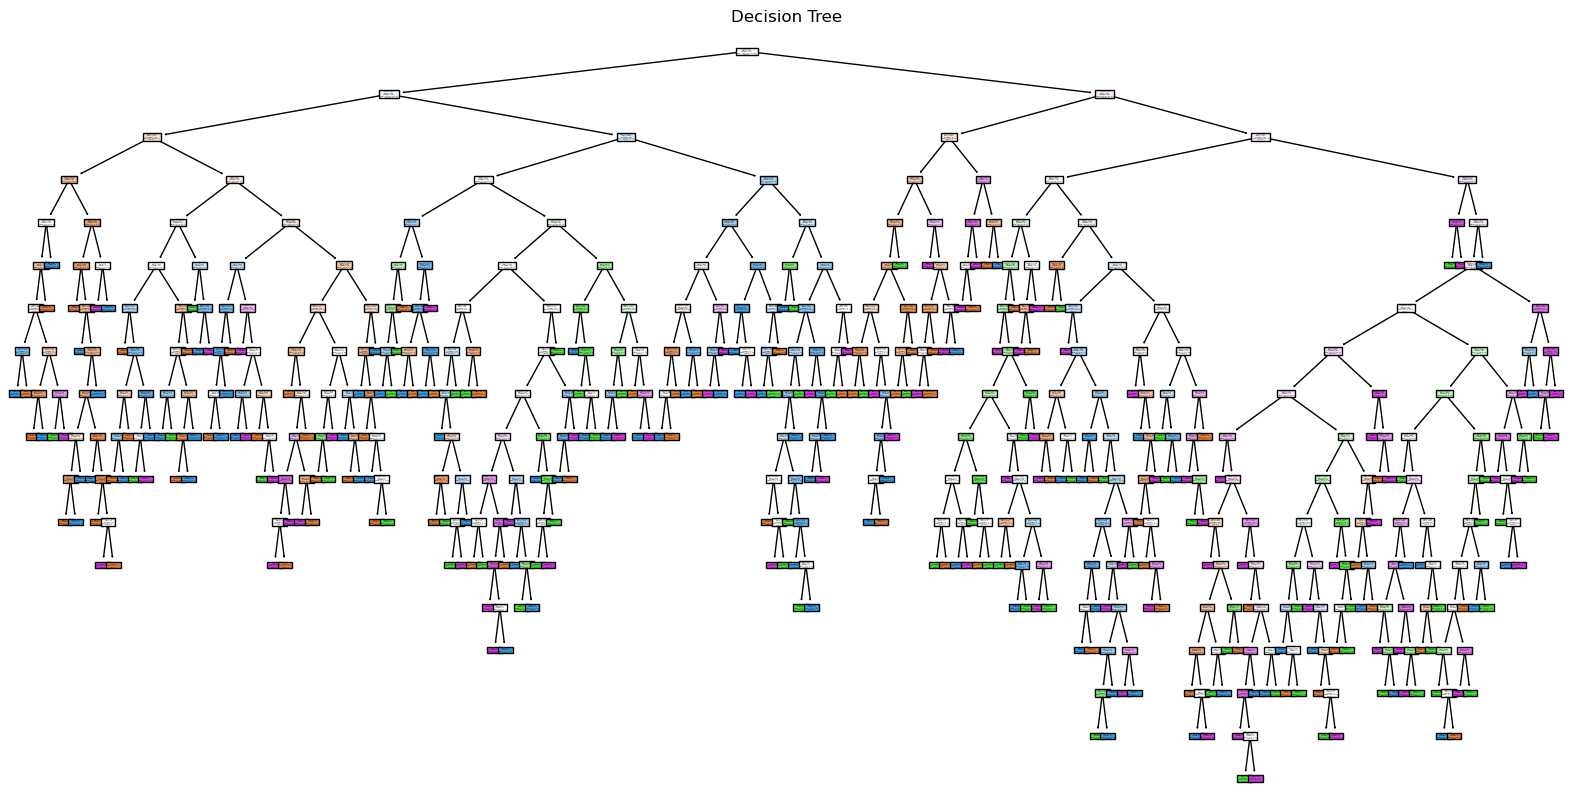

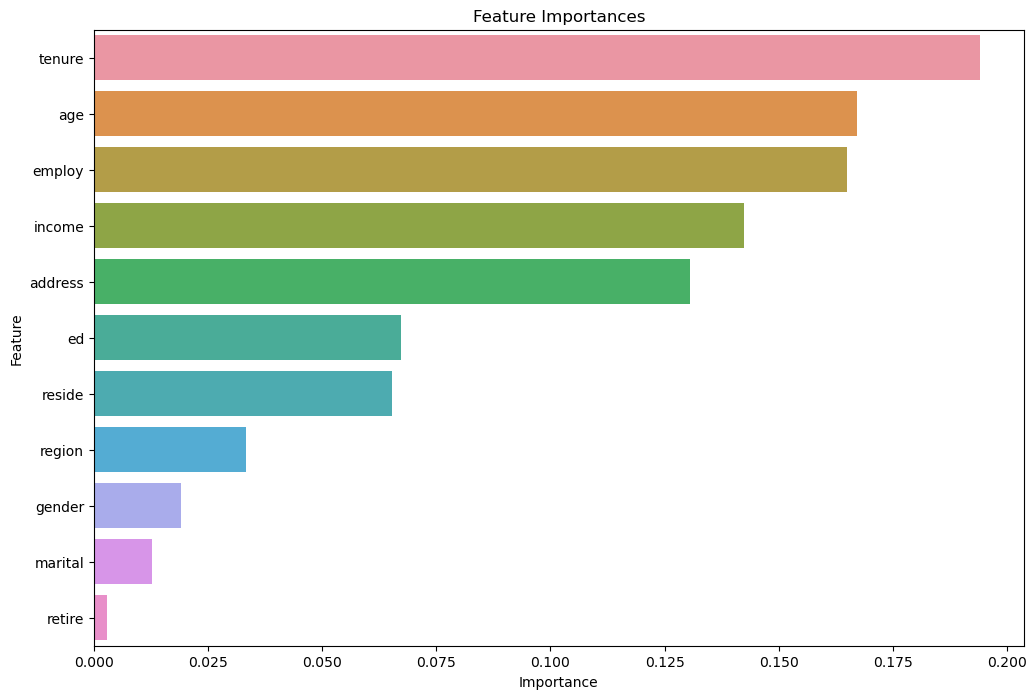

In [52]:
# Preprocessing
# Encode the target variable (already encoded)
# Splitting the data into features and target variable
X = data.drop('custcat', axis=1)
y = data['custcat']

# Check the distribution of classes in the target variable
print("\nDistribution of classes in the target variable:")
print(y.value_counts())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model Fitting
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=[str(c) for c in model.classes_])
plt.title('Decision Tree')
plt.show()

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()